In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [4]:
# Lectura de datos
data = pd.read_csv('regLinPoli.csv')
data.shape

(1029, 5)

In [5]:
# Visualización rápida de datos
data.head(15)

,X,X2,X3,X4,y
0,7.317938,53.552216,1.683319,0.859736,20.716319
1,1.284357,1.649574,3.395139,0.959256,8.098008
2,97.740652,9553.235088,0.366480,-0.344100,5992.603427
3,17.753591,315.190006,-1.945300,-0.889370,199.959361
4,66.441081,4414.417290,0.504995,-0.450777,2384.624168
5,40.916163,1674.132433,0.075603,-0.075387,1002.555777
6,95.687035,9156.008719,7.558314,0.991361,5623.634585
7,83.685262,7003.223054,-2.162977,0.907687,3983.231742
8,39.873426,1589.890107,-1.450718,0.823344,819.971467
9,90.678945,8222.671039,-0.455287,0.414362,4895.671410


In [6]:
x_trn, x_tst, y_trn, y_tst = train_test_split(data[data.keys()[:-1]], data.y, train_size = .75)

In [210]:
# Estandarización de datos
escalaX = StandardScaler()
escalaX.fit(x_trn)
x_trn = escalaX.transform(x_trn)
escalaX.fit(x_tst)
x_tst = escalaX.transform(x_tst)

escalaY = StandardScaler()
escalaY.fit(y_trn)
y_trn = escalaY.transform(y_trn)
escalaY.fit(y_tst)
y_tst = escalaY.transform(y_tst)

In [8]:
# Lambdas
lamb = np.linspace(-1,1,200)
lamb

array([-1.        , -0.98994975, -0.9798995 , -0.96984925, -0.95979899,
       -0.94974874, -0.93969849, -0.92964824, -0.91959799, -0.90954774,
       -0.89949749, -0.88944724, -0.87939698, -0.86934673, -0.85929648,
       -0.84924623, -0.83919598, -0.82914573, -0.81909548, -0.80904523,
       -0.79899497, -0.78894472, -0.77889447, -0.76884422, -0.75879397,
       -0.74874372, -0.73869347, -0.72864322, -0.71859296, -0.70854271,
       -0.69849246, -0.68844221, -0.67839196, -0.66834171, -0.65829146,
       -0.64824121, -0.63819095, -0.6281407 , -0.61809045, -0.6080402 ,
       -0.59798995, -0.5879397 , -0.57788945, -0.5678392 , -0.55778894,
       -0.54773869, -0.53768844, -0.52763819, -0.51758794, -0.50753769,
       -0.49748744, -0.48743719, -0.47738693, -0.46733668, -0.45728643,
       -0.44723618, -0.43718593, -0.42713568, -0.41708543, -0.40703518,
       -0.39698492, -0.38693467, -0.37688442, -0.36683417, -0.35678392,
       -0.34673367, -0.33668342, -0.32663317, -0.31658291, -0.30

In [9]:
# Función de salida
#Esta fn calcula las y's que estima la regresión
def y_gorro(x,b):
    y = (np.dot(np.concatenate
                ((np.ones((len(x),1)),np.array(x).reshape(len(x),int(x_trn.shape[1]))),axis=1),
                np.array(b).reshape(len(b),1)))
    return y

In [153]:
# Ahora se define una fn que vaya recalculando el error conforme tenga nuevos datos
def trainer_ridge(x,y,eta=.000001):
    lamb = np.linspace(-1,1,200)
    err = pd.DataFrame(np.zeros((len(x),1)))
    ws = pd.DataFrame(np.zeros((len(x),1)))
    for l in xrange(len(lamb)):
        y = np.array(y).reshape(len(y),1)
        x = np.array(x).reshape(len(x),int(x_trn.shape[1]))
        # la inicio, arbitrariamente, en 1
        b = [1 for i in data.keys()]
        err_mat  = pd.DataFrame(np.zeros((len(x),6)), columns=['err','w0','w1','w2','w3','w4'])
        for j in xrange(len(x)):
            # cálculo del error INCLUYENDO LOS VALORES ANTERIORES (por eso los dos puntos(:))
            V =(y[j]-y_gorro(x[:j+1],b)[j])[0]
            # uso las betas
            b_ant = np.array([i for i in b])
            # almaceno los datos en la tabla
            err_mat.ix[j] = [V, b[0], b[1], b[2], b[3],b[4]]
            x_new = np.insert([value for value in x_trn[j]],0,1)
            for k in xrange(len(b)):
                b[k] = b[k]+eta*(V)*x_new[k]-lamb[l]*b[k]
        
        err[str(lamb[l])] = err_mat['err']
        ws['w0_'+str(lamb[l])] = err_mat['w0']
        ws['w1_'+str(lamb[l])] = err_mat['w1']
        ws['w2_'+str(lamb[l])] = err_mat['w2']
        ws['w3_'+str(lamb[l])] = err_mat['w3']
        ws['w4_'+str(lamb[l])] = err_mat['w4']
    err.drop(0,1,inplace=True)   
    ws.drop(0,1,inplace=True)
    RES = pd.DataFrame((err**2).mean(),columns=['Avg'])
    optimal_lamb = RES.loc[RES.Avg==(err**2).mean().min()]
    optimal_W = ws[ws.columns[np.logical_or(ws.keys()=='w0_'+optimal_lamb.index[0],
                                            np.logical_or(ws.keys()=='w1_'+optimal_lamb.index[0],
                                                          np.logical_or(ws.keys()=='w2_ '+optimal_lamb.index[0],
                                                                        np.logical_or(ws.keys()=='w3_'+optimal_lamb.index[0],
                                                                                      ws.keys()=='w4_'+optimal_lamb.index[0]
                                                                                     ))))]]
    return optimal_lamb, optimal_W, RES

In [154]:
H = trainer_ridge(x_trn,y_trn)

In [158]:
# ¿Qué lambda minimiza el error promedio?
H[0]

,Avg
0.00502512562814,0.837654


In [156]:
# ¿cuáles son los vectores W = [w0,w1,w2,w3] de esa lambda?
H[1]

,w0_0.00502512562814,w1_0.00502512562814,w3_0.00502512562814,w4_0.00502512562814
0,1.000000,1.000000,1.000000,1.000000
1,0.994975,0.994975,0.994975,0.994975
2,0.989977,0.989974,0.989974,0.989972
3,0.985001,0.984999,0.984999,0.984997
4,0.980051,0.980050,0.980049,0.980048
5,0.975124,0.975124,0.975124,0.975121
6,0.970223,0.970222,0.970223,0.970223
7,0.965348,0.965347,0.965348,0.965347
8,0.960495,0.960496,0.960497,0.960495
9,0.955665,0.955664,0.955670,0.955665


In [157]:
H[2]

,Avg
-1.0,inf
-0.989949748744,inf
-0.979899497487,inf
-0.969849246231,inf
-0.959798994975,inf
-0.949748743719,inf
-0.939698492462,inf
-0.929648241206,inf
-0.91959798995,inf
-0.909547738693,inf


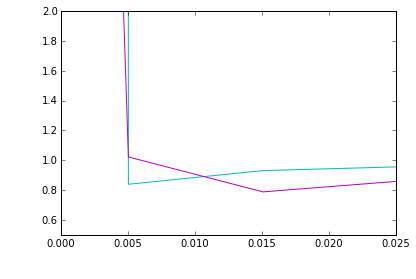

In [261]:
#Comparación de los errores de entrenamiento y los de tst
%matplotlib inline
tst = trainer_ridge(x_tst,y_tst)[2]
plt.hold(True)
plt.plot([i for i in H[2].index], H[2].Avg, color = 'c')
plt.plot(tst.index,tst.Avg,color='m')
plt.plot()
plt.xlim(xmin=0,xmax=.025)
plt.ylim(ymin=.5,ymax=2)
plt.annotate('Error de entrenamiento',xy=(0,0),xytext=(0.1,1.1),color='c')
plt.annotate('Error de validación',xy=(0,0),xytext=(0.1,.7),color='m')
